# Phase 4: Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning:

Looking at all the given data that is the csv files and merging only data required for our analysis to form a  final dataframe

In [2]:
df_01=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df_01

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [3]:
df_01.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [4]:
df_01['TOTAL MURDERS']=df_01[['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']].sum(axis=1)
df_01=df_01.drop(columns=['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'])
df_01['TOTAL RAPES']=df_01[['RAPE', 'CUSTODIAL RAPE','OTHER RAPE']].sum(axis=1)
df_01=df_01.drop(columns=['RAPE', 'CUSTODIAL RAPE','OTHER RAPE'])
df_01['TOTAL KIDNAPPINGS']=df_01[['KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS']].sum(axis=1)
df_01=df_01.drop(columns=['KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS'])
df_01['TOTAL ROBERRY/THEFT']=df_01[['DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT','AUTO THEFT', 'OTHER THEFT']].sum(axis=1)
df_01=df_01.drop(columns=['DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT','AUTO THEFT', 'OTHER THEFT'])
df_01['TOTAL CHEATING/FRAUD']=df_01[['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING']].sum(axis=1)
df_01=df_01.drop(columns=['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING'])
df_01['TOTAL CRIME AGAINST WOMEN/GIRLS']=df_01[['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']].sum(axis=1)
df_01=df_01.drop(columns=['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'])
df_01.head()

,STATE/UT,DISTRICT,YEAR,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426


In [5]:
df_01.shape

(9017, 15)

In [6]:
df_02_sc=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df_02_sc

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [7]:
df_02_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [8]:
df_02_sc['TOTAL CRIMES AGAINST SC']=df_02_sc.iloc[:,3:].sum(axis=1)

In [9]:
df_sc_total=df_02_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]
df_sc_total

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [10]:
df_02_st=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
df_02_st

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [11]:
df_02_st['TOTAL CRIMES AGAINST ST']=df_02_st.iloc[:,3:].sum(axis=1)

In [12]:
df_st_total=df_02_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]
df_st_total

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0


In [13]:
df_03_children=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\03_District_wise_crimes_committed_against_children_2001_2012.csv")
df_03_children

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [14]:
df_03_children.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [15]:
df_03_children.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
df_children_total=df_03_children[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]
df_children_total

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9011,LAKSHADWEEP,TOTAL,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7
9013,PUDUCHERRY,PUDUCHERRY,2012,25


In [17]:
df_juvenile=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\08_01_Juvenile_apprehended_state_IPC_2001_2010.csv")
df_juvenile

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,Puducherry,2010,Cruelty by Husband or Relatives,0,0,0,0,0,0,0,0,0
10496,Puducherry,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0
10497,Puducherry,2010,Causing death by negligence,0,0,0,0,0,0,0,0,0
10498,Puducherry,2010,Other IPC Crimes,0,0,1,0,2,3,3,3,6


In [18]:
df_juvenile['STATE/UT'] = df_juvenile['STATE/UT'].str.upper()

In [19]:
df_juvenile.set_index(['STATE/UT','Year'],inplace=True)

In [20]:
df_juvenile=df_juvenile.sum(level=['STATE/UT','Year'])

In [21]:
df_juvenile=df_juvenile.reset_index()

In [22]:
df_juvenile.rename(columns={"Grand total":"TOTAL JUVENILE CRIMES"},inplace=True)
df_juvenile

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,TOTAL JUVENILE CRIMES
0,ANDHRA PRADESH,2001,MurderAttempt to Commit MurderC H Not amountin...,298,12,1446,10,1486,176,3230,198,3428
1,ANDHRA PRADESH,2002,MurderAttempt to Commit MurderC H Not amountin...,265,13,1299,88,1456,314,3020,415,3435
2,ANDHRA PRADESH,2003,MurderAttempt to Commit MurderC H Not amountin...,114,0,1062,74,2780,240,3956,314,4270
3,ANDHRA PRADESH,2004,MurderAttempt to Commit MurderC H Not amountin...,133,4,1102,72,1862,118,3097,194,3291
4,ANDHRA PRADESH,2005,MurderAttempt to Commit MurderC H Not amountin...,181,3,1350,40,1771,160,3302,203,3505
...,...,...,...,...,...,...,...,...,...,...,...,...
345,PUDUCHERRY,2006,MurderAttempt to Commit MurderC H Not amountin...,0,0,45,0,46,2,91,2,93
346,PUDUCHERRY,2007,MurderAttempt to Commit MurderC H Not amountin...,0,0,49,0,91,8,140,8,148
347,PUDUCHERRY,2008,MurderAttempt to Commit MurderC H Not amountin...,0,0,27,0,95,0,122,0,122
348,PUDUCHERRY,2009,MurderAttempt to Commit MurderC H Not amountin...,0,0,80,6,91,2,171,8,179


In [23]:
df_juvenile_total = df_juvenile[['STATE/UT', 'Year', 'TOTAL JUVENILE CRIMES']]
df_juvenile_total


,STATE/UT,Year,TOTAL JUVENILE CRIMES
0,ANDHRA PRADESH,2001,3428
1,ANDHRA PRADESH,2002,3435
2,ANDHRA PRADESH,2003,4270
3,ANDHRA PRADESH,2004,3291
4,ANDHRA PRADESH,2005,3505
...,...,...,...
345,PUDUCHERRY,2006,93
346,PUDUCHERRY,2007,148
347,PUDUCHERRY,2008,122
348,PUDUCHERRY,2009,179


In [24]:
df_againstpolice=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\13_Police_killed_or_injured_on_duty2001_2010.csv")
df_againstpolice

,Area_Name,Year,Group_Name,Sub_Group_Name,Police_Injured_By_Criminals,Police_Injured_By_Riotous_Mobs,Police_Injured_In_Accidents,Police_Injured_In_Dacoity_OperationsOther_raids,Police_Injured_In_TerroristsExtremists_Operations,Police_Injured_On_Border_Duties,Police_Injured_Total_Policemen,Police_Killed_By_Criminals,Police_Killed_By_Riotous_Mobs,Police_Killed_In_Accidents,Police_Killed_In_Dacoity_OperationsOther_raids,Police_Killed_In_TerroristsExtremists_Operations,Police_Killed_On_Border_Duties,Police_Killed_Total_Policemen
0,Andaman & Nicobar Islands,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,3,4,1,3,0,11,0,0,2,0,3,0,5
2,Arunachal Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assam,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,Bihar,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,1,0,0,0,2,0,3,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Tamil Nadu,2010,Police - Total,7. Total Police Killed or Injured,10,26,142,4,0,0,182,2,0,65,0,0,0,67
2446,Tripura,2010,Police - Total,7. Total Police Killed or Injured,0,0,0,0,2,0,2,0,0,0,0,0,2,2
2447,Uttar Pradesh,2010,Police - Total,7. Total Police Killed or Injured,6,10,9,10,0,8,43,2,1,101,0,0,1,105
2448,Uttarakhand,2010,Police - Total,7. Total Police Killed or Injured,0,0,5,0,0,0,5,0,0,15,0,0,0,15


In [25]:
df_againstpolice.rename(columns={"Area_Name": "STATE/UT", "Police_Killed_Total_Policemen": "TOTAL POLICEMEN KILLED"}, inplace=True)
df_againstpolice

,STATE/UT,Year,Group_Name,Sub_Group_Name,Police_Injured_By_Criminals,Police_Injured_By_Riotous_Mobs,Police_Injured_In_Accidents,Police_Injured_In_Dacoity_OperationsOther_raids,Police_Injured_In_TerroristsExtremists_Operations,Police_Injured_On_Border_Duties,Police_Injured_Total_Policemen,Police_Killed_By_Criminals,Police_Killed_By_Riotous_Mobs,Police_Killed_In_Accidents,Police_Killed_In_Dacoity_OperationsOther_raids,Police_Killed_In_TerroristsExtremists_Operations,Police_Killed_On_Border_Duties,TOTAL POLICEMEN KILLED
0,Andaman & Nicobar Islands,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,3,4,1,3,0,11,0,0,2,0,3,0,5
2,Arunachal Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assam,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,Bihar,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,1,0,0,0,2,0,3,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Tamil Nadu,2010,Police - Total,7. Total Police Killed or Injured,10,26,142,4,0,0,182,2,0,65,0,0,0,67
2446,Tripura,2010,Police - Total,7. Total Police Killed or Injured,0,0,0,0,2,0,2,0,0,0,0,0,2,2
2447,Uttar Pradesh,2010,Police - Total,7. Total Police Killed or Injured,6,10,9,10,0,8,43,2,1,101,0,0,1,105
2448,Uttarakhand,2010,Police - Total,7. Total Police Killed or Injured,0,0,5,0,0,0,5,0,0,15,0,0,0,15


In [26]:
df_againstpolice['STATE/UT'] = df_againstpolice['STATE/UT'].str.upper()
df_againstpolice

,STATE/UT,Year,Group_Name,Sub_Group_Name,Police_Injured_By_Criminals,Police_Injured_By_Riotous_Mobs,Police_Injured_In_Accidents,Police_Injured_In_Dacoity_OperationsOther_raids,Police_Injured_In_TerroristsExtremists_Operations,Police_Injured_On_Border_Duties,Police_Injured_Total_Policemen,Police_Killed_By_Criminals,Police_Killed_By_Riotous_Mobs,Police_Killed_In_Accidents,Police_Killed_In_Dacoity_OperationsOther_raids,Police_Killed_In_TerroristsExtremists_Operations,Police_Killed_On_Border_Duties,TOTAL POLICEMEN KILLED
0,ANDAMAN & NICOBAR ISLANDS,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ANDHRA PRADESH,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,3,4,1,3,0,11,0,0,2,0,3,0,5
2,ARUNACHAL PRADESH,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ASSAM,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,BIHAR,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,1,0,0,0,2,0,3,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,TAMIL NADU,2010,Police - Total,7. Total Police Killed or Injured,10,26,142,4,0,0,182,2,0,65,0,0,0,67
2446,TRIPURA,2010,Police - Total,7. Total Police Killed or Injured,0,0,0,0,2,0,2,0,0,0,0,0,2,2
2447,UTTAR PRADESH,2010,Police - Total,7. Total Police Killed or Injured,6,10,9,10,0,8,43,2,1,101,0,0,1,105
2448,UTTARAKHAND,2010,Police - Total,7. Total Police Killed or Injured,0,0,5,0,0,0,5,0,0,15,0,0,0,15


In [27]:
df_againstpolice.set_index(['STATE/UT','Year'],inplace=True)

In [28]:
df_againstpolice=df_againstpolice.sum(level=['STATE/UT','Year'])

In [29]:
df_againstpolice=df_againstpolice.reset_index()

In [30]:
df_policekilled_total=df_againstpolice[['STATE/UT','Year','TOTAL POLICEMEN KILLED']]
df_policekilled_total

,STATE/UT,Year,TOTAL POLICEMEN KILLED
0,ANDAMAN & NICOBAR ISLANDS,2001,0
1,ANDHRA PRADESH,2001,140
2,ARUNACHAL PRADESH,2001,2
3,ASSAM,2001,68
4,BIHAR,2001,28
...,...,...,...
345,TAMIL NADU,2010,134
346,TRIPURA,2010,4
347,UTTAR PRADESH,2010,210
348,UTTARAKHAND,2010,30


In [31]:
df_againstwomen=pd.read_csv(r"C:\Users\pooja\OneDrive\Desktop\Capstone\India_Crime\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df_againstwomen

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [32]:
df_againstwomen['TOTAL CRIMES AGAINST WOMEN']=df_againstwomen.iloc[:,3:].sum(axis=1)

In [33]:
df_women_total=df_againstwomen[['STATE/UT','Year','DISTRICT','TOTAL CRIMES AGAINST WOMEN']]
df_women_total

,STATE/UT,Year,DISTRICT,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,2001,ADILABAD,454
1,ANDHRA PRADESH,2001,ANANTAPUR,356
2,ANDHRA PRADESH,2001,CHITTOOR,456
3,ANDHRA PRADESH,2001,CUDDAPAH,278
4,ANDHRA PRADESH,2001,EAST GODAVARI,475
...,...,...,...,...
9012,LAKSHADWEEP,2012,LAKSHADWEEP,2
9013,LAKSHADWEEP,2012,TOTAL,2
9014,PUDUCHERRY,2012,KARAIKAL,11
9015,PUDUCHERRY,2012,PUDUCHERRY,35


<B> MERGING THE ABOVE DATASETS!!<BR>

In [34]:
df_01.rename(columns={"YEAR":"Year"},inplace=True)

In [35]:
data=pd.merge(df_01,df_sc_total)
data

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374,55
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303,127
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395,114
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,LAKSHADWEEP,LAKSHADWEEP,2012,10,3,3,0,32,60,0,0,0,17,0,2,0
8822,LAKSHADWEEP,TOTAL,2012,10,3,3,0,32,60,0,0,0,17,0,2,0
8823,PUDUCHERRY,KARAIKAL,2012,17,1,186,44,392,787,13,12,4,187,17,3,1
8824,PUDUCHERRY,PUDUCHERRY,2012,109,20,632,219,1668,3494,55,14,34,1242,88,14,23


In [36]:
data1=pd.merge(data,df_st_total)
data1

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303,127,14
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395,114,2
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426,89,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,LAKSHADWEEP,LAKSHADWEEP,2012,10,3,3,0,32,60,0,0,0,17,0,2,0,0
8826,LAKSHADWEEP,TOTAL,2012,10,3,3,0,32,60,0,0,0,17,0,2,0,0
8827,PUDUCHERRY,KARAIKAL,2012,17,1,186,44,392,787,13,12,4,187,17,3,1,0
8828,PUDUCHERRY,PUDUCHERRY,2012,109,20,632,219,1668,3494,55,14,34,1242,88,14,23,0


In [37]:
data2=pd.merge(data1,df_children_total)
data2

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374,55,18,0
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303,127,14,66
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395,114,2,0
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238,100,4,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426,89,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,LAKSHADWEEP,LAKSHADWEEP,2012,10,3,3,0,32,60,0,0,0,17,0,2,0,0,0
8816,LAKSHADWEEP,TOTAL,2012,10,3,3,0,32,60,0,0,0,17,0,2,0,0,0
8817,PUDUCHERRY,KARAIKAL,2012,17,1,186,44,392,787,13,12,4,187,17,3,1,0,7
8818,PUDUCHERRY,PUDUCHERRY,2012,109,20,632,219,1668,3494,55,14,34,1242,88,14,23,0,25


In [38]:
data3=pd.merge(data2,df_juvenile_total)

data3

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374,55,18,0,3428
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303,127,14,66,3428
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395,114,2,0,3428
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238,100,4,0,3428
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426,89,14,0,3428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,LAKSHADWEEP,LAKSHADWEEP,2010,3,2,1,0,26,42,0,0,0,15,0,0,0,0,0,0
7201,LAKSHADWEEP,TOTAL,2010,3,2,1,0,26,42,0,0,0,15,0,0,0,0,0,0
7202,PUDUCHERRY,KARAIKAL,2010,31,1,208,44,364,762,7,2,4,115,15,21,4,0,2,101
7203,PUDUCHERRY,PUDUCHERRY,2010,100,9,598,198,1503,3173,61,4,30,1042,77,55,27,0,14,101


In [39]:
data4=pd.merge(data3,data2)
data4

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374,55,18,0,3428
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303,127,14,66,3428
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395,114,2,0,3428
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238,100,4,0,3428
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426,89,14,0,3428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,LAKSHADWEEP,LAKSHADWEEP,2010,3,2,1,0,26,42,0,0,0,15,0,0,0,0,0,0
7269,LAKSHADWEEP,TOTAL,2010,3,2,1,0,26,42,0,0,0,15,0,0,0,0,0,0
7270,PUDUCHERRY,KARAIKAL,2010,31,1,208,44,364,762,7,2,4,115,15,21,4,0,2,101
7271,PUDUCHERRY,PUDUCHERRY,2010,100,9,598,198,1503,3173,61,4,30,1042,77,55,27,0,14,101


In [40]:
finaldata=pd.merge(data4,df_women_total)
finaldata

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374,55,18,0,3428,454
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303,127,14,66,3428,356
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395,114,2,0,3428,456
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238,100,4,0,3428,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426,89,14,0,3428,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,LAKSHADWEEP,LAKSHADWEEP,2010,3,2,1,0,26,42,0,0,0,15,0,0,0,0,0,0,0
7271,LAKSHADWEEP,TOTAL,2010,3,2,1,0,26,42,0,0,0,15,0,0,0,0,0,0,0
7272,PUDUCHERRY,KARAIKAL,2010,31,1,208,44,364,762,7,2,4,115,15,21,4,0,2,101,24
7273,PUDUCHERRY,PUDUCHERRY,2010,100,9,598,198,1503,3173,61,4,30,1042,77,55,27,0,14,101,69


In [41]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275 entries, 0 to 7274
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   STATE/UT                         7275 non-null   object
 1   DISTRICT                         7275 non-null   object
 2   Year                             7275 non-null   int64 
 3   RIOTS                            7275 non-null   int64 
 4   ARSON                            7275 non-null   int64 
 5   HURT/GREVIOUS HURT               7275 non-null   int64 
 6   CAUSING DEATH BY NEGLIGENCE      7275 non-null   int64 
 7   OTHER IPC CRIMES                 7275 non-null   int64 
 8   TOTAL IPC CRIMES                 7275 non-null   int64 
 9   TOTAL MURDERS                    7275 non-null   int64 
 10  TOTAL RAPES                      7275 non-null   int64 
 11  TOTAL KIDNAPPINGS                7275 non-null   int64 
 12  TOTAL ROBERRY/THEFT              7

In [42]:
finaldata = finaldata[~finaldata['DISTRICT'].str.contains('TOTAL', case=False)]

## Clustering

In [43]:
finaldata=finaldata.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [44]:
finaldata

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,875,327,12323,2834,18619,51128,1820,1000,1190,8819,1773,5888,539,192,89,38369,6827
1,ANDHRA PRADESH,ANANTAPUR,1167,382,13687,3887,13964,49056,2638,464,1364,12117,1444,3709,1361,281,310,38369,4349
2,ANDHRA PRADESH,CHITTOOR,857,335,11073,7148,22419,65782,1719,646,1534,22678,2791,5636,1172,14,288,38369,6394
3,ANDHRA PRADESH,CUDDAPAH,1107,302,9896,3826,19511,46697,1331,462,1008,8257,1666,3497,1285,90,455,38369,4141
4,ANDHRA PRADESH,CYBERABAD,479,394,24656,8034,17458,106119,2141,954,2188,52734,9273,10573,1309,267,80,31506,11715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,WEST BENGAL,PURAB MIDNAPUR,3218,53,97,1256,11782,25856,863,850,1342,5447,528,3999,4,6,88,3719,5067
747,WEST BENGAL,PURULIA,691,12,43,0,6525,13222,649,764,360,4475,332,1939,6,7,8,3781,2433
748,WEST BENGAL,SEALDAH G.R.P.,101,0,135,4,476,3554,216,36,104,4588,93,54,0,0,2,3781,99
749,WEST BENGAL,SILIGURI G.R.P.,23,0,0,0,286,1281,43,4,48,1707,11,22,0,1,5,3781,43


Using KMEANS for clustering

In [45]:
x=finaldata.iloc[:,2:]

In [46]:
kmeans=KMeans(n_clusters=3)

In [47]:
y_kmeans=kmeans.fit_predict(x)

##  Creating data frames

## 1) Sensitive Areas

In [48]:
sensitive_areas=finaldata[y_kmeans==2]
sensitive_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,875,327,12323,2834,18619,51128,1820,1000,1190,8819,1773,5888,539,192,89,38369,6827
1,ANDHRA PRADESH,ANANTAPUR,1167,382,13687,3887,13964,49056,2638,464,1364,12117,1444,3709,1361,281,310,38369,4349
2,ANDHRA PRADESH,CHITTOOR,857,335,11073,7148,22419,65782,1719,646,1534,22678,2791,5636,1172,14,288,38369,6394
3,ANDHRA PRADESH,CUDDAPAH,1107,302,9896,3826,19511,46697,1331,462,1008,8257,1666,3497,1285,90,455,38369,4141
4,ANDHRA PRADESH,CYBERABAD,479,394,24656,8034,17458,106119,2141,954,2188,52734,9273,10573,1309,267,80,31506,11715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,WEST BENGAL,BURDWAN,2657,91,1109,3952,19492,43634,1658,1372,1328,12655,1024,5343,37,20,13,3781,6432
738,WEST BENGAL,JALPAIGURI,695,67,5018,2291,17579,48432,2133,2806,2452,21559,952,5756,4,3,32,3781,8159
740,WEST BENGAL,KOLKATA,2260,0,13645,4413,37926,115907,1576,638,2230,68512,13502,5464,1,0,1360,3781,6635
743,WEST BENGAL,MURSHIDABAD,2701,153,11386,2561,12300,58822,3372,5324,3596,12545,1090,14017,7,7,88,3781,18242


## 2) Moderate Areas

In [50]:
moderate_areas=finaldata[y_kmeans==1]
moderate_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,GUNTAKAL RLY.,2,1,58,26,706,2596,62,4,18,3229,58,39,5,0,5,38369,47
8,ANDHRA PRADESH,GUNTUR URBAN,9,9,321,232,1009,3208,70,24,54,1630,272,360,36,11,24,4585,377
20,ANDHRA PRADESH,RAJAHMUNDRY,5,4,620,164,316,2022,42,20,60,906,121,186,83,3,2,4585,208
22,ANDHRA PRADESH,SECUNDERABAD RLY.,9,1,112,26,557,4674,98,10,16,7228,191,24,6,0,0,38369,31
23,ANDHRA PRADESH,SRIKAKULAM,360,250,9884,2606,10819,32314,496,412,342,5565,936,3168,1032,126,74,38369,3533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,WEST BENGAL,PURAB MIDNAPUR,3218,53,97,1256,11782,25856,863,850,1342,5447,528,3999,4,6,88,3719,5067
747,WEST BENGAL,PURULIA,691,12,43,0,6525,13222,649,764,360,4475,332,1939,6,7,8,3781,2433
748,WEST BENGAL,SEALDAH G.R.P.,101,0,135,4,476,3554,216,36,104,4588,93,54,0,0,2,3781,99
749,WEST BENGAL,SILIGURI G.R.P.,23,0,0,0,286,1281,43,4,48,1707,11,22,0,1,5,3781,43


## 3) Peaceful Areas

In [52]:
peaceful_areas=finaldata[y_kmeans==0]
peaceful_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
335,MADHYA PRADESH,ANUPPUR,105,47,1847,73,5392,10637,270,536,88,2412,129,846,75,167,207,105897,1148
336,MADHYA PRADESH,ASHOK NAGAR,258,98,6641,427,5915,17845,495,760,104,3206,147,1344,720,122,452,105897,1769
337,MADHYA PRADESH,BALAGHAT,367,136,4185,736,14293,26971,878,1348,164,5093,192,2057,377,418,824,132373,2795
338,MADHYA PRADESH,BARWANI,283,77,3181,1010,9378,18847,603,680,78,4660,111,1026,223,285,477,117471,1401
339,MADHYA PRADESH,BETUL,124,168,4311,1041,16082,30842,1006,2572,444,6024,228,2434,459,768,1456,132373,3920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,MAHARASHTRA,THANE COMMR.,2831,162,13637,3036,10955,80820,1893,1244,1660,58149,6981,4362,244,43,1045,126741,5516
429,MAHARASHTRA,THANE RURAL,2577,274,7367,5961,9846,48310,1913,1198,786,22666,1987,2636,222,355,353,126741,3459
430,MAHARASHTRA,WARDHA,1100,558,7892,1536,13762,38877,766,672,444,16400,708,2318,126,48,397,126741,2861
431,MAHARASHTRA,WASHIM,889,284,4552,848,5427,20568,509,346,298,9351,351,1992,279,24,264,126741,2297


TOP 5 safest areas in India

In [ ]:
peaceful_areas['OVERALL CRIME']=peaceful_areas.iloc[:,2:].sum(axis=1)

In [ ]:
peaceful_areas.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [67]:
peaceful_areas.head(5).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,MADHYA PRADESH,ANUPPUR,105,47,1847,73,5392,10637,270,536,88,2412,129,846,75,167,207,105897,1148
1,MADHYA PRADESH,ASHOK NAGAR,258,98,6641,427,5915,17845,495,760,104,3206,147,1344,720,122,452,105897,1769
2,MADHYA PRADESH,BALAGHAT,367,136,4185,736,14293,26971,878,1348,164,5093,192,2057,377,418,824,132373,2795
3,MADHYA PRADESH,BARWANI,283,77,3181,1010,9378,18847,603,680,78,4660,111,1026,223,285,477,117471,1401
4,MADHYA PRADESH,BETUL,124,168,4311,1041,16082,30842,1006,2572,444,6024,228,2434,459,768,1456,132373,3920


TOP 5 most unsafe areas in India

In [69]:
sensitive_areas['OVERALL CRIME']=sensitive_areas.iloc[:,2:].sum(axis=1)

In [70]:
sensitive_areas.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [71]:
sensitive_areas.head(5).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,KARNATAKA,BANGALORE COMMR.,3724,44,31951,904,108214,290767,5531,910,3818,194688,22739,5673,1147,16,70,8862,6436,685494
1,GUJARAT,AHMEDABAD COMMR.,2119,57,13692,1655,77732,176455,1771,766,3684,112596,5022,9745,659,35,1109,46523,11430,465050
2,MAHARASHTRA,MUMBAI COMMR.,1611,86,20112,3665,34681,159515,1857,1866,1802,139719,12837,4644,128,8,1923,72225,6174,462853
3,ANDHRA PRADESH,HYDERABAD CITY,1858,282,40628,4958,23180,171282,2550,1158,2566,109163,19865,14993,1098,57,698,38369,16192,448897
4,MAHARASHTRA,MUMBAI,944,38,18382,3487,31636,141815,1999,1552,1586,126163,9451,3082,67,2,1021,54516,4251,399992


##   What is impacting more crimes in sensitive areas?

In [56]:
data_collected=pd.read_csv("data_collected.csv")
data_collected

,STATE/UT,Litrecy2001,Litrecy2011,Population2001,Population2011,Poverty2004,Poverty2011,PovertyDecrease,Area (km2),Unemp%2004,Unemp%2010
0,A & N islands,81.30,86.63,356000,380000,30.93,19.086667,11.843333,8249,7.50,8.20
1,Andhra Pradesh,60.47,67.02,76210000,84666000,29.90,9.200000,20.700000,162975,2.15,2.15
2,Arunachal Pradesh,54.34,65.38,1098000,1383000,31.10,34.700000,-3.600000,83743,1.05,2.35
3,Assam,63.25,72.19,26656000,31169000,34.40,32.000000,2.400000,78438,4.90,4.55
4,Bihar,47.00,61.80,82999000,103805000,54.40,33.700000,20.700000,94163,3.95,4.65
5,Chandigarh,81.94,86.05,901000,1055000,30.93,19.086667,11.843333,114,3.30,14.05
6,Chhattisgarh,64.66,70.28,20834000,25540000,49.40,39.900000,9.500000,135192,2.05,1.75
7,D & N Haveli,57.63,76.24,220000,343000,30.93,19.086667,11.843333,603,3.15,5.05
8,Daman & Diu,78.18,87.10,158000,243000,30.93,19.086667,11.843333,603,1.65,3.20
9,Delhi,81.67,86.21,13851000,16753000,13.10,9.900000,3.200000,1484,3.35,2.15


In [57]:
data_collected['STATE/UT'] = data_collected['STATE/UT'].str.upper()

In [58]:
impact_sensitive_areas=pd.merge(sensitive_areas,data_collected)

In [59]:
impact_sensitive_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Litrecy2001,Litrecy2011,Population2001,Population2011,Poverty2004,Poverty2011,PovertyDecrease,Area (km2),Unemp%2004,Unemp%2010
0,ANDHRA PRADESH,ADILABAD,875,327,12323,2834,18619,51128,1820,1000,...,60.47,67.02,76210000,84666000,29.9,9.2,20.7,162975,2.15,2.15
1,ANDHRA PRADESH,ANANTAPUR,1167,382,13687,3887,13964,49056,2638,464,...,60.47,67.02,76210000,84666000,29.9,9.2,20.7,162975,2.15,2.15
2,ANDHRA PRADESH,CHITTOOR,857,335,11073,7148,22419,65782,1719,646,...,60.47,67.02,76210000,84666000,29.9,9.2,20.7,162975,2.15,2.15
3,ANDHRA PRADESH,CUDDAPAH,1107,302,9896,3826,19511,46697,1331,462,...,60.47,67.02,76210000,84666000,29.9,9.2,20.7,162975,2.15,2.15
4,ANDHRA PRADESH,CYBERABAD,479,394,24656,8034,17458,106119,2141,954,...,60.47,67.02,76210000,84666000,29.9,9.2,20.7,162975,2.15,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,WEST BENGAL,BURDWAN,2657,91,1109,3952,19492,43634,1658,1372,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
132,WEST BENGAL,JALPAIGURI,695,67,5018,2291,17579,48432,2133,2806,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
133,WEST BENGAL,KOLKATA,2260,0,13645,4413,37926,115907,1576,638,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
134,WEST BENGAL,MURSHIDABAD,2701,153,11386,2561,12300,58822,3372,5324,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95


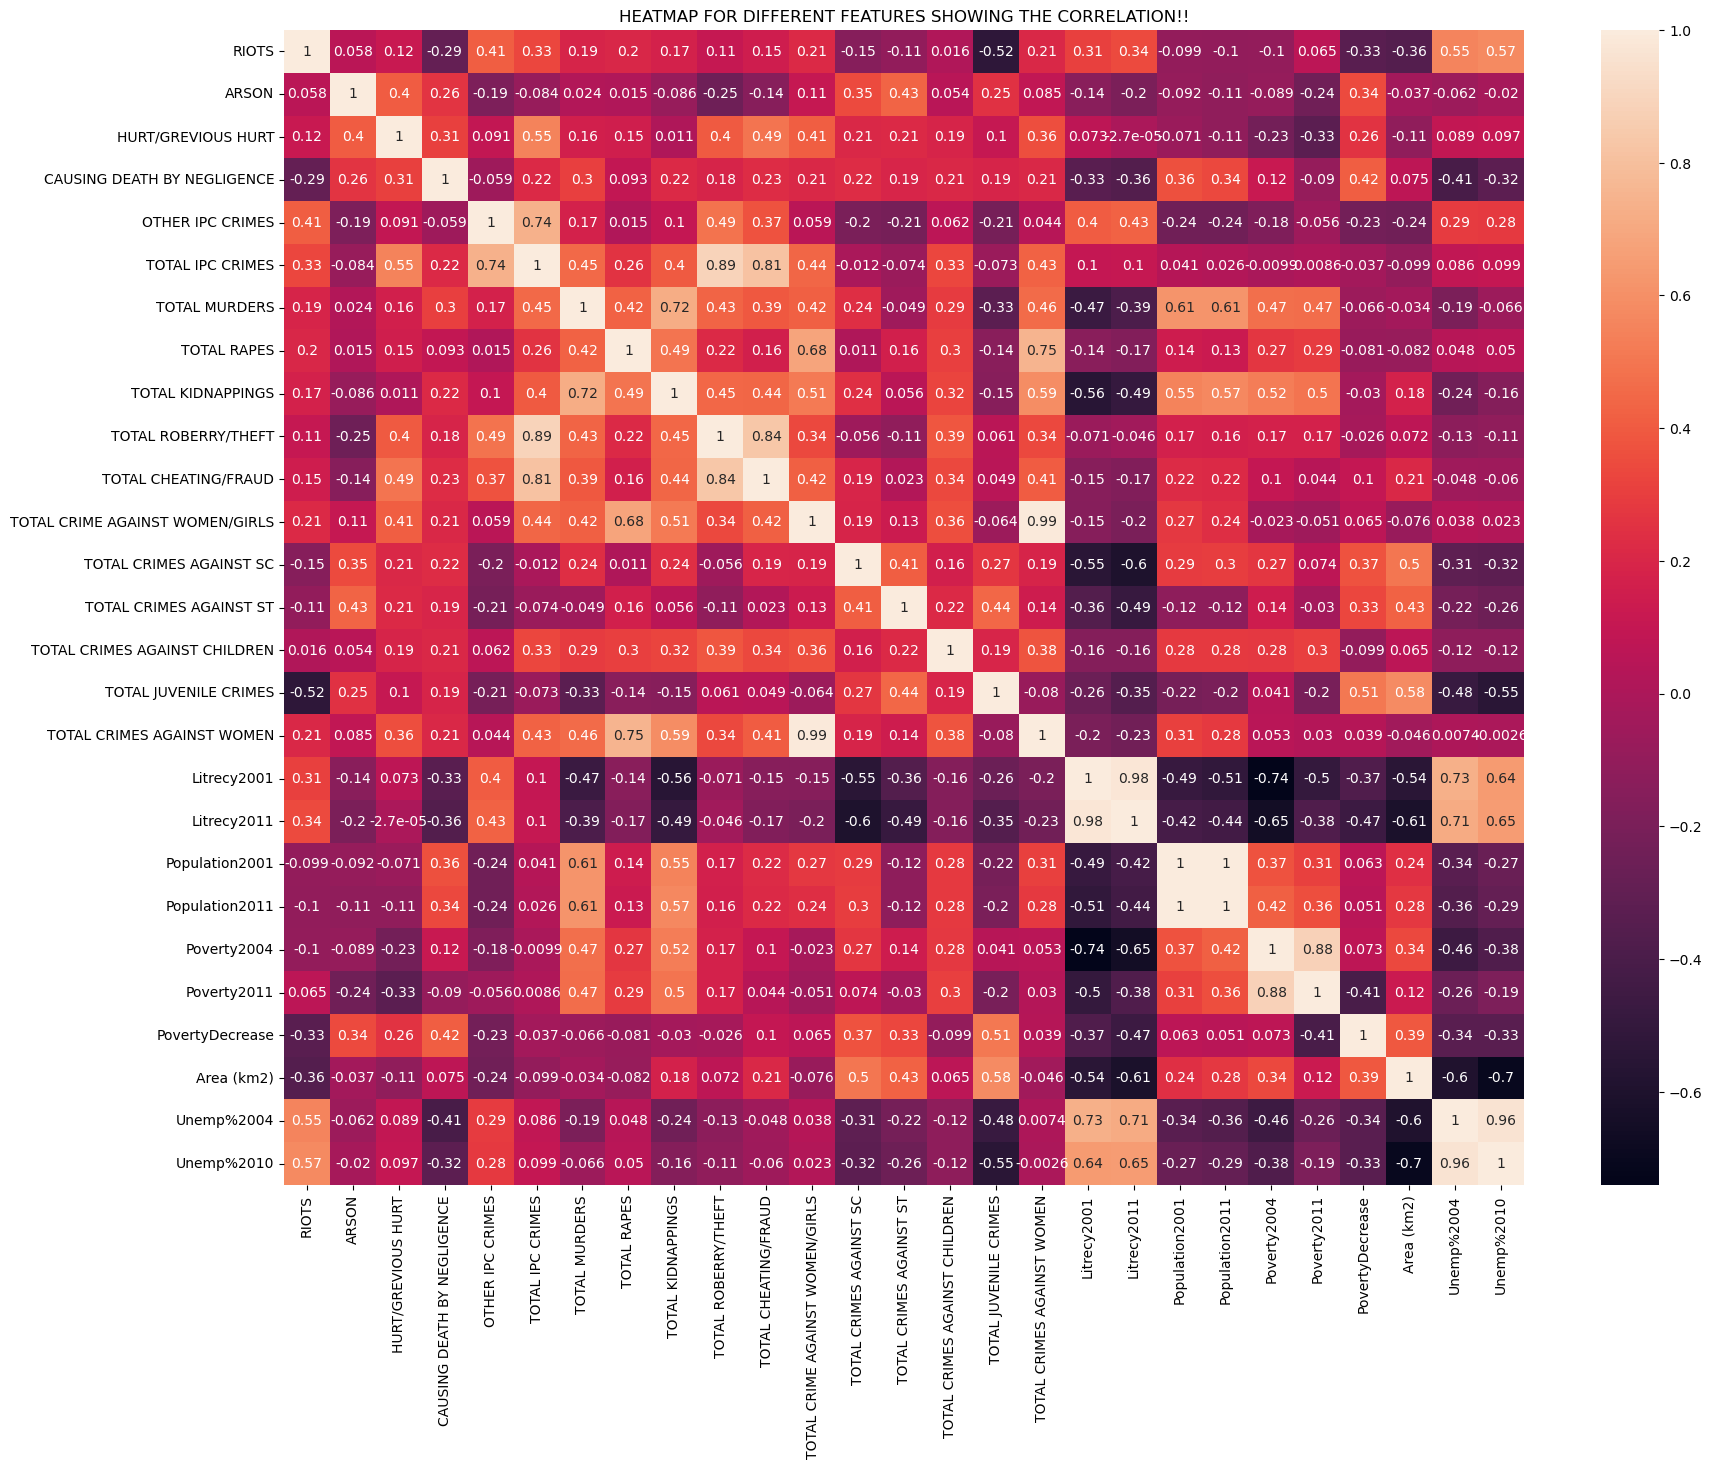

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(impact_sensitive_areas.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

From the above plot we can look at how different aspects like area,literacy,poverty,population and unemployment affect the crime rate 


## What needs to be done to reduce crime.

Reducing crime in India is a complex and multifaceted issue that requires a coordinated effort from various stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public. Here are some measures that can help reduce crime in India:<BR><BR>
Strengthen law enforcement: The government needs to allocate more resources and funds to law enforcement agencies to improve their capacity to prevent and investigate crimes. Police reforms should be implemented to make the force more accountable, efficient, and effective.<BR><BR>
Address socio-economic factors: Poverty, unemployment, and lack of education are significant contributors to crime. The government needs to take measures to address these issues by creating job opportunities, improving access to education, and providing basic amenities like water, electricity, and healthcare.<BR><BR>
Strengthen the justice system: The justice system in India is often slow and inefficient, which can lead to frustration and disillusionment among the public. Steps should be taken to streamline the justice system and make it more responsive to the needs of the people.<BR><BR>
Raise public awareness: People should be made aware of the consequences of crime and the importance of reporting crime. Awareness campaigns should be conducted to educate people about their rights and responsibilities.<BR><BR>
Improve community policing: Community policing can help build trust between the police and the community, leading to better crime prevention and investigation. The police should work closely with the community to identify and address local issues.<BR><BR>
Use technology: Technology can play a significant role in preventing and solving crimes. The government should invest in modernizing the police force with advanced technology like CCTV cameras, drones, and digital forensics.<BR><BR>
Reform the prison system: The prison system in India is overcrowded and inhumane, which can lead to the further radicalization of inmates. The government needs to take steps to improve the conditions in prisons and provide inmates with access to education and vocational training.<BR><BR>

## Capstone project overall story

India is a diverse country with a population of over 1.38 billion people, and crime is a significant issue that affects its citizens. According to the  data available from the National Crime Records Bureau (NCRB) for the year 2011, there were a total of 2.27 million reported cases of crime in India in 2011, a decrease of 4.54% from the previous year.

Crimes against women, including rape, sexual harassment, and domestic violence, continue to be a major concern in India. In 2011, there were 2,13,949 reported cases of crimes against women, and 11.04% of these cases were related to rape or sexual assault. Despite the enactment of stricter laws and increased public awareness, crimes against women remain a persistent problem in India.

Crimes against children including rape, kidnapping and abduction ,murder,traffacking,importation of girl are still the leading concerns in India. In 2011, there were 33,049 reported cases of crimes against children, and 21.51% of these cases were related to rape or sexual assault, and record 46.24% of the csaes are recorded of the murder only among differnt crimes against children.Even after various laws and stricter law enforcements  being made to control the crimes against children  a increase  by 254.86% can be seen from the year 2001 to 2011.Madhya Pradesh records the most cases counting to 40,217 over the years and is followed by Uttar Pradesh and Maharastra counting the numbers to 29,969 and 27,845.In the year 2011 33,718 cases were recorded against SC.
 
Involvement of juveniles can also be seen as a serious threat to the society.Often misguided,mishandled the juveniles tends towards to opt the wrong ways. As its easy to influence them stricter laws should be made to overcome this issue.Total of 23,597 cases were recorded in 2001 which then increased to 27,471 in the year 2011.Madhya Pradesh have the most cases recording to 61,939 and manipur being the least in the cases.

Human right violation by the police too offers significant amount of share in total ipc crimes.Year 2009 have the most cases recorded in any year , counting the crimes to 664.There is 82.815% decrease in the cases from the year 2001 to 2011.Chattisgarh have the most cases of human right violation across the states 2001 to 2011.

Its also important to note that those who have the duty of maintaining the law and order in the state i,e the police department have also the cases of getting assaulted by the Rioutous_mob,extremists,in counter insurgency operation,border opeartions and many more.Uttar pradesh recorded 2150 cases from the year 2001 to 2011, Jammu Kashmir also holds the 4 position with the total count of 1142.0 .Almost 5% increase in the cases can be seen from the year 2001 to 2011.In JAMMU & KASHMIR a decrease in the cases of assaults and killing of the police/army personnel acan be seen as the cases in 2001 were 300 which reduced to 50 in 2010 , 83.33 % direct decrease in the cases.

Maharastra, Uttar Pradesh  and Madhya Pradesh had the most cases for DACOITY/ROBBERY/BURGALARY/THEFT combined together with counts being 
Maharastra-7,17,452<BR>
Madhya Pradesh-3,89,927<BR>
UTTAR PRADESH-3,66,166<BR>



Overall, while there has been a increase in the number of reported crimes in India hinting that  there are still significant challenges to be addressed. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address socio-economic factors that contribute to crime.